<a href="https://colab.research.google.com/github/dcolbourne/Colab/blob/TensorFlow/neuralnetworkregression2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print(tf.__version__)

import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.utils import plot_model

2.17.1


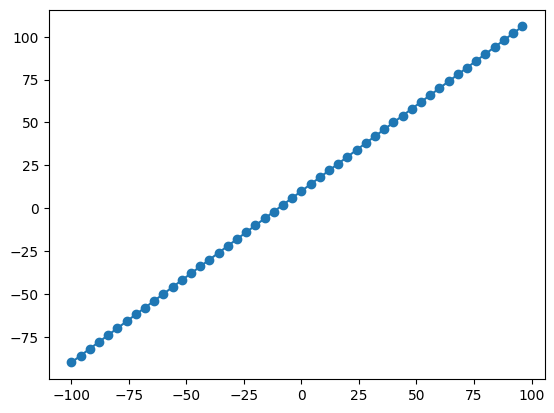

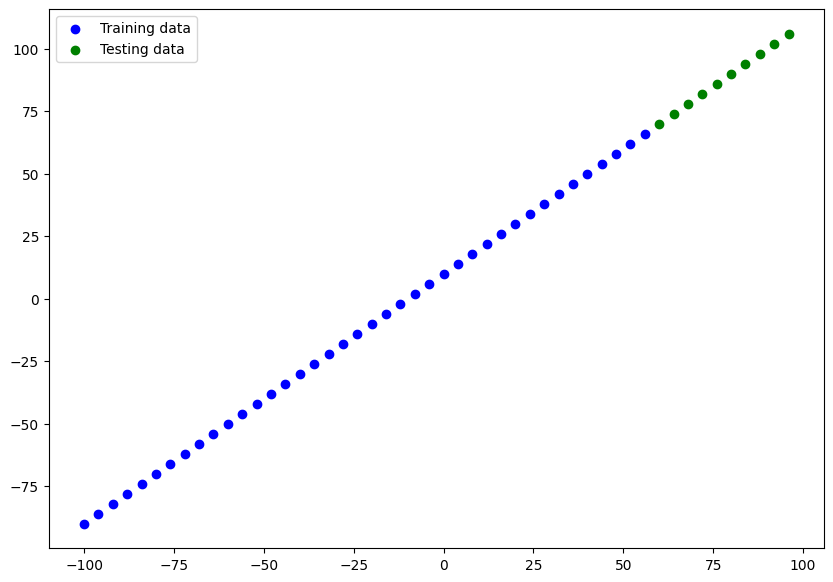

In [2]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

Y = X + 10
Y

plt.plot(X,Y)
plt.scatter(X,Y)

# Turn our NumPy arrays in tensors with dtype float32
X = tf.cast(tf.constant(X), dtype=tf.float32)
Y = tf.cast(tf.constant(Y), dtype=tf.float32)
X, Y

X_train = X[:40]
Y_train = Y[:40]

X_test = X[40:]
Y_test = Y[40:]

len(X_train), len(Y_train), len(X_test), len(Y_test)

plt.figure(figsize=(10,7))
plt.scatter(X_train, Y_train, c="b", label="Training data")
plt.scatter(X_test, Y_test, c="g", label="Testing data")
plt.legend();

In [5]:
# Build Model_1

# 1. Create the model

tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
], name="Model_1")

# 2. Compile the model

model_1.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3.  Let's fit our model to the training data

model_1.fit(tf.expand_dims(X_train, axis=-1), Y_train, epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 16.5167 - mae: 16.5167 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 10.2149 - mae: 10.2149
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7.8268 - mae: 7.8268 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 10.7155 - mae: 10.7155 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7.6458 - mae: 7.6458 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 11.8803 - mae: 11.8803 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.0009 - mae: 8.0009  
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.6934 - mae: 9.6934 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 7.9830 - mae: 7.9830
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 9.6818 - mae: 9.6818
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.9652 - mae: 7.9652 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9.6702 - mae: 9.6702 
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0

In [4]:
plot_model(model=model_5, show_shapes=True, show_layer_names=True)

NameError: name 'model_5' is not defined

In [6]:
y_pred = model_1.predict(X_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


array([[ 69.778435],
       [ 74.336205],
       [ 78.893974],
       [ 83.451744],
       [ 88.009514],
       [ 92.56728 ],
       [ 97.12506 ],
       [101.68283 ],
       [106.2406  ],
       [110.79837 ]], dtype=float32)

In [7]:
# model_1.fit(X_train, Y_train, epochs=100, verbose=0)

In [9]:
model_1.summary()



Model: "Model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [10]:

y_pred = model_1.predict(X_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


array([[ 69.778435],
       [ 74.336205],
       [ 78.893974],
       [ 83.451744],
       [ 88.009514],
       [ 92.56728 ],
       [ 97.12506 ],
       [101.68283 ],
       [106.2406  ],
       [110.79837 ]], dtype=float32)

In [11]:
# Let's create a plotting function

def plot_predictions(train_data = X_train,
                     train_labels = Y_train,
                     test_data = X_test,
                     test_labels = Y_test,
                     predictions = y_pred):

  """
  Plots training data, test data and compares predictions to ground truth labels.
  """

  plt.figure(figsize=(10,7))
  # Plot raining data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot testing data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot model's predictions in red
  plt.scatter(test_data, predictions, c="r", label="Prediciton data")
  # Show the legend
  plt.legend();

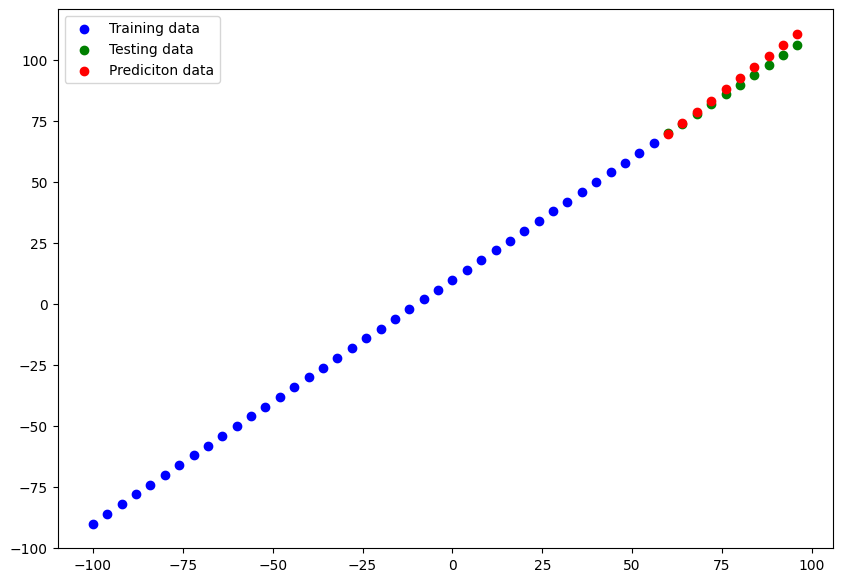

In [12]:
plot_predictions(train_data= X_train, train_labels = Y_train,
                     test_data = X_test,
                     test_labels = Y_test,
                     predictions = y_pred )

In [13]:
# Make some functions to reuse MAE and MSE

def mae(y_true, y_pred):
  return tf.metrics.MeanAbsoluteError()(y_true, tf.squeeze(y_pred))

def mse(y_true, y_pred):
  return tf.metrics.MeanSquaredError()(y_true, tf.squeeze(y_pred))



In [14]:
# Make some predictions

y_pred = model_1.predict(X_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


array([[ 69.778435],
       [ 74.336205],
       [ 78.893974],
       [ 83.451744],
       [ 88.009514],
       [ 92.56728 ],
       [ 97.12506 ],
       [101.68283 ],
       [106.2406  ],
       [110.79837 ]], dtype=float32)

In [15]:
mae(Y_test, y_pred), mse(Y_test, y_pred)

(<tf.Tensor: shape=(), dtype=float32, numpy=2.3327148>,
 <tf.Tensor: shape=(), dtype=float32, numpy=7.803427>)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


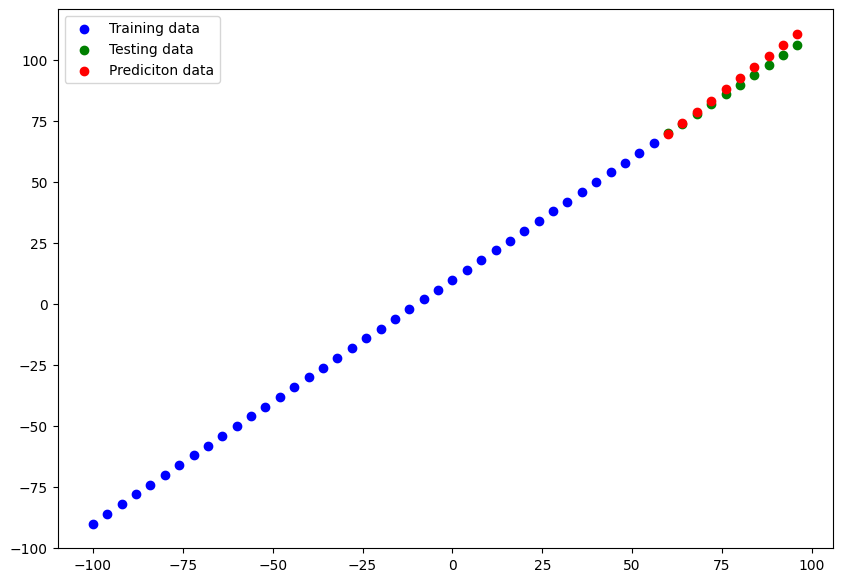

In [16]:
# Make and plot predictions for Model_1

y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [17]:
y_preds_1 = tf.squeeze(y_preds_1)
y_preds_1

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 69.778435,  74.336205,  78.893974,  83.451744,  88.009514,
        92.56728 ,  97.12506 , 101.68283 , 106.2406  , 110.79837 ],
      dtype=float32)>

In [18]:
# Calculate Model_1 evaluation metrics
mae_1 = mae(Y_test, y_preds_1)
mse_1 = mse(Y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=2.3327148>,
 <tf.Tensor: shape=(), dtype=float32, numpy=7.803427>)

In [19]:
# Build Model_2

# 1. Create the model

tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation="linear"),
    tf.keras.layers.Dense(10, activation="linear"),
    tf.keras.layers.Dense(1)
], name="Model_2")

# 2. Compile the model

model_2.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

# 3.  Let's fit our model to the training data

model_2.fit(tf.expand_dims(X_train, axis=-1), Y_train, epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 74.4455 - mae: 74.4455
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 61.0574 - mae: 61.0574 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 49.0080 - mae: 49.0080 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 38.1200 - mae: 38.1200 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 27.9027 - mae: 27.9027 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 17.9386 - mae: 17.9386 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 9.1877 - mae: 9.1877
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 11.3894 - mae: 11.3894 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 14.0066 - mae: 14.0066 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 14.6490 - mae: 14.6490 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 13.4209 - mae: 13.4209 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 11.3046 - mae: 11.3046
Epoch 13/100
2/2 ━━━━━━━━━━

In [20]:
y_pred = model_2.predict(X_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


array([[ 71.87124 ],
       [ 75.99899 ],
       [ 80.12674 ],
       [ 84.25448 ],
       [ 88.38222 ],
       [ 92.50996 ],
       [ 96.637695],
       [100.76545 ],
       [104.893196],
       [109.02094 ]], dtype=float32)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


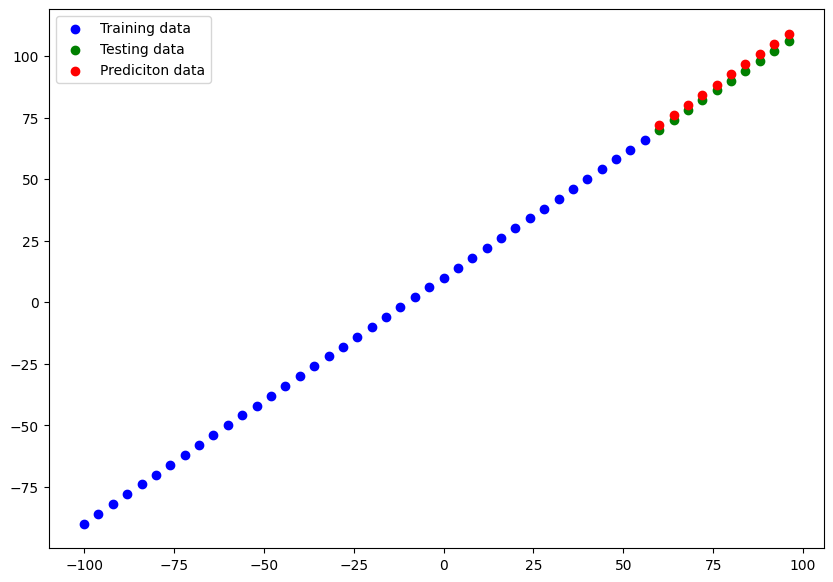

In [21]:
# Make and plot predictions for Model_2

y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [22]:
# Calculate model_3 evalutation metrics

mae_2 = mae(Y_test, y_preds_2)
mse_2 = mse(Y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=2.4460907>,
 <tf.Tensor: shape=(), dtype=float32, numpy=6.1179867>)

In [23]:
# Build Model_3

# 1. Create the model

tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation="linear"),
    tf.keras.layers.Dense(1)
], name="Model_3")

# 2. Compile the model

model_3.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mse"])

# 3.  Let's fit our model to the training data

model_3.fit(tf.expand_dims(X_train, axis=-1), Y_train, epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 43.4829 - mse: 2556.5813 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 36.6261 - mse: 1806.8937 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 29.9105 - mse: 1198.7450 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 23.3176 - mse: 725.2595 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 16.9325 - mse: 383.3438 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 10.9882 - mse: 170.9504 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.9335 - mse: 88.4852 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 10.3358 - mse: 107.4069 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 11.6920 - mse: 148.6478 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 12.1583 - mse: 169.5064 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 11.9321 - mse: 161.9365 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 11.1699 - mse: 134.2234 
Epoch 13/10

In [24]:
y_pred = model_3.predict(X_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


array([[ 71.96283 ],
       [ 76.09629 ],
       [ 80.22975 ],
       [ 84.36321 ],
       [ 88.49667 ],
       [ 92.63014 ],
       [ 96.7636  ],
       [100.89707 ],
       [105.03053 ],
       [109.163994]], dtype=float32)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


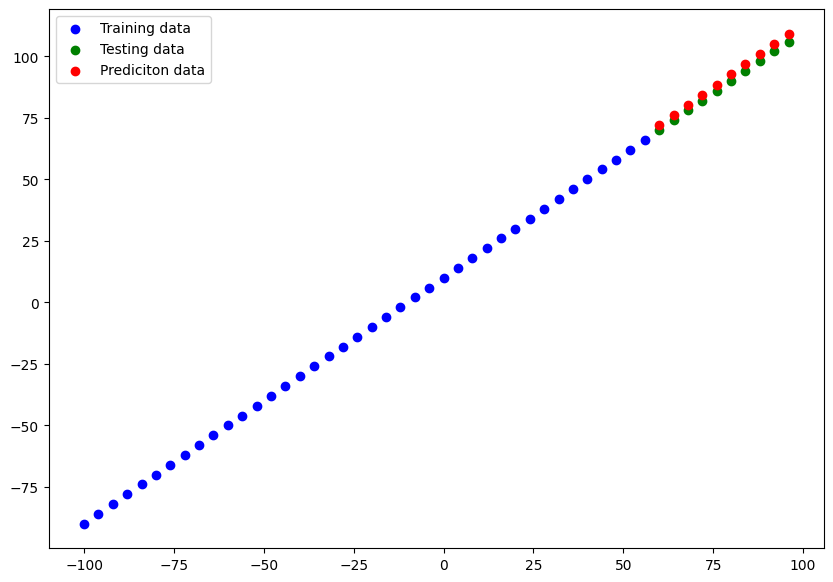

In [25]:
# Make and plot predictions for Model_3

y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [26]:
# Calculate model_3 evalutation metrics

mae_3 = mae(Y_test, y_preds_3)
mse_3 = mse(Y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=2.5634103>,
 <tf.Tensor: shape=(), dtype=float32, numpy=6.718024>)

In [27]:
# Build Model_4

# 1. Create the model

tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation="linear"),
    tf.keras.layers.Dense(1)
], name="Model_4")

# 2. Compile the model

model_4.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mse"])

# 3.  Let's fit our model to the training data

model_4.fit(tf.expand_dims(X_train, axis=-1), Y_train, epochs=500)

Epoch 1/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 46.2202 - mse: 2893.7490 
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 38.1906 - mse: 1966.2906 
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 30.2983 - mse: 1230.9156 
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 22.5975 - mse: 680.2991 
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 15.2055 - mse: 311.6584 
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.0961 - mse: 120.4098 
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.6270 - mse: 95.5373 
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 11.9351 - mse: 156.9009 
Epoch 9/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 13.0804 - mse: 212.1371 
Epoch 10/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 13.3249 - mse: 228.8697 
Epoch 11/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 12.8675 - mse: 207.2766 
Epoch 12/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 11.8611 - mse: 161.9304 
Epoch 13/500

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


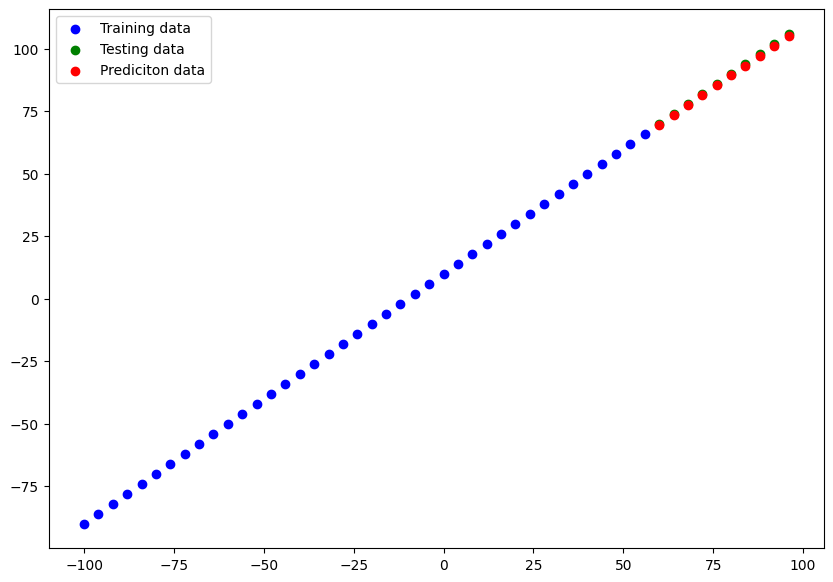

In [28]:
# Make and plot predictions for Model_4

y_preds_4 = model_4.predict(X_test)
plot_predictions(predictions=y_preds_4)

In [29]:
mae_4 = mae(Y_test, y_preds_4)
mse_4 = mse(Y_test, y_preds_4)
mae_4, mse_4

(<tf.Tensor: shape=(), dtype=float32, numpy=0.6471817>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.42801014>)

In [30]:
# Build Model_5

# 1. Create the model

tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation="linear"),
    tf.keras.layers.Dense(10, activation="linear"),
    tf.keras.layers.Dense(10, activation="linear"),
    tf.keras.layers.Dense(10, activation="linear"),
    tf.keras.layers.Dense(1)
], name="Model_5")

# 2. Compile the model

model_5.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
              metrics=["mse"])

# 3.  Let's fit our model to the training data

model_5.fit(tf.expand_dims(X_train, axis=-1), Y_train, epochs=500)

Epoch 1/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 24.4494 - mse: 2778.1721
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 10.3995 - mse: 281.6362
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 40.5418 - mse: 2230.1697 
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 28.8081 - mse: 1168.8016 
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 31.5109 - mse: 1498.3685
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 26.1088 - mse: 918.5001
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 16.4444 - mse: 363.8125
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 12.6824 - mse: 233.0023 
Epoch 9/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 13.1347 - mse: 234.0134 
Epoch 10/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 10.2653 - mse: 152.9597 
Epoch 11/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 14.8233 - mse: 311.4525 
Epoch 12/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 10.9381 - mse: 163.7459 
Epoch 13/

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


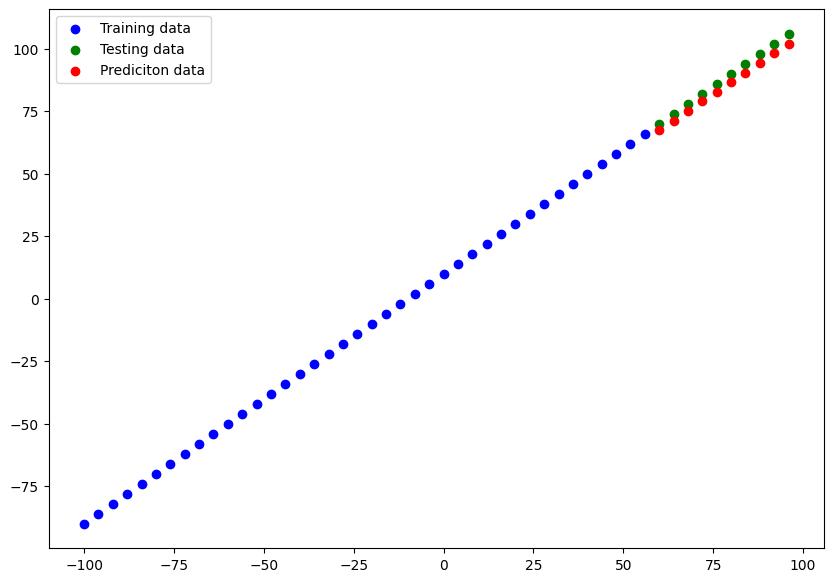

In [31]:
# Make and plot predictions for Model_5

y_preds_5 = model_5.predict(X_test)
plot_predictions(predictions=y_preds_5)

In [32]:
mae_5 = mae(Y_test, y_preds_5)
mse_5 = mse(Y_test, y_preds_5)
mae_5, mse_5

(<tf.Tensor: shape=(), dtype=float32, numpy=3.274594>,
 <tf.Tensor: shape=(), dtype=float32, numpy=10.901012>)

### Comparing the results of our experiments

We've run a few experiments, let's compare the results.

In [33]:
# Let's compare our models's results using a panadas DataFrame

import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                  ["model_2", mae_2.numpy(), mse_2.numpy()],
                  ["model_3", mae_3.numpy(), mse_3.numpy()],
                  ["model_4", mae_4.numpy(), mse_4.numpy()],
                  ["model_5", mae_5.numpy(), mse_5.numpy()]]

all_results = pd.DataFrame(model_results, columns=['Model', "MAE", "MSE"])
all_results

,Model,MAE,MSE
0,model_1,2.332715,7.803427
1,model_2,2.446091,6.117987
2,model_3,2.563410,6.718024
3,model_4,0.647182,0.428010
4,model_5,3.274594,10.901012


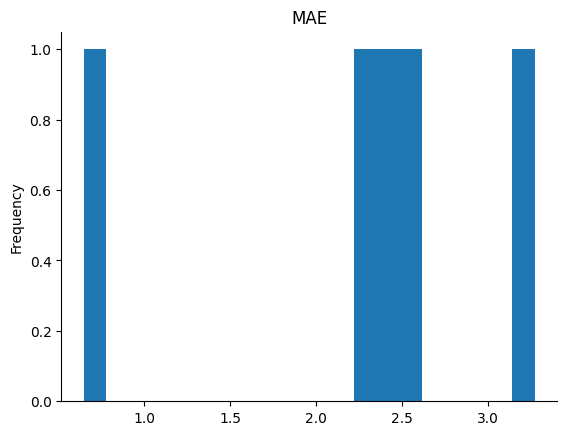

In [34]:
from matplotlib import pyplot as plt
all_results['MAE'].plot(kind='hist', bins=20, title='MAE')
plt.gca().spines[['top', 'right',]].set_visible(False)

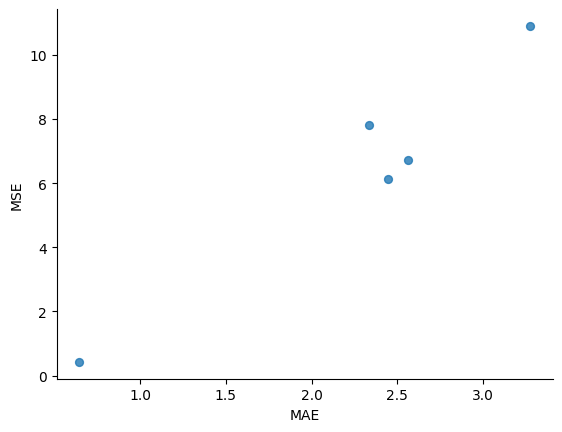

In [35]:
from matplotlib import pyplot as plt
all_results.plot(kind='scatter', x='MAE', y='MSE', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

<ipython-input-36-36fe7a337e3a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(all_results, x='MSE', y='Model', inner='stick', palette='Dark2')


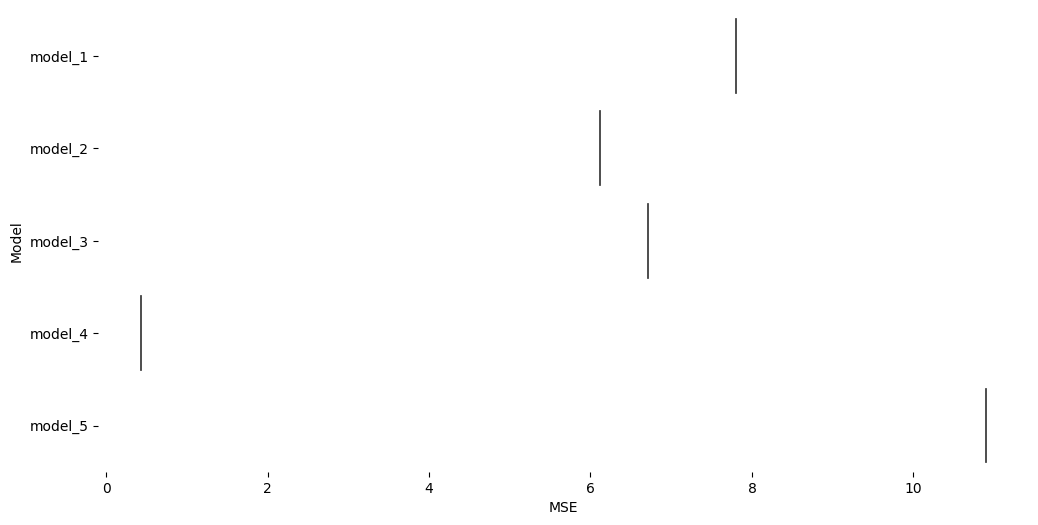

In [36]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(all_results['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(all_results, x='MSE', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [37]:
all_results


,Model,MAE,MSE
0,model_1,2.332715,7.803427
1,model_2,2.446091,6.117987
2,model_3,2.563410,6.718024
3,model_4,0.647182,0.428010
4,model_5,3.274594,10.901012


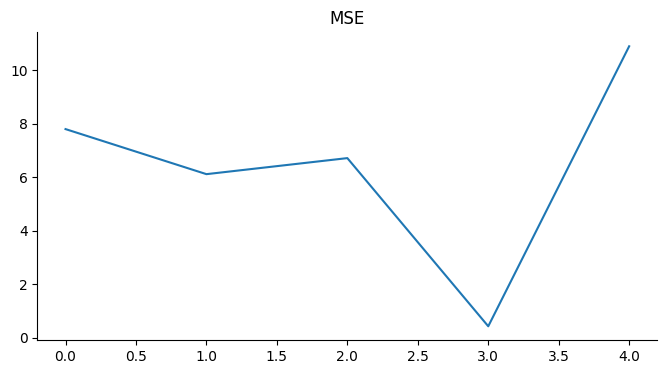

In [38]:
from matplotlib import pyplot as plt
all_results['MSE'].plot(kind='line', figsize=(8, 4), title='MSE')
plt.gca().spines[['top', 'right']].set_visible(False)

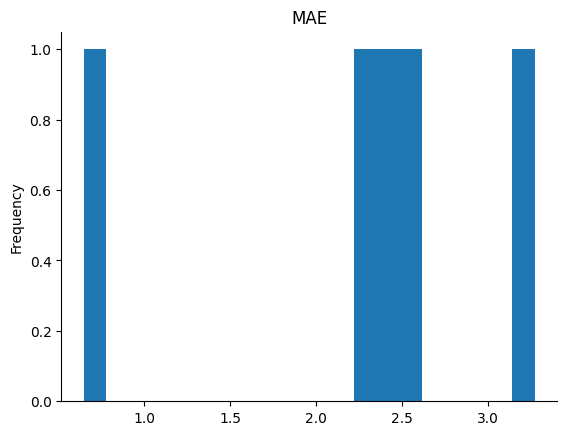

In [39]:
# @title MAE

from matplotlib import pyplot as plt
all_results['MAE'].plot(kind='hist', bins=20, title='MAE')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [40]:
all_results

,Model,MAE,MSE
0,model_1,2.332715,7.803427
1,model_2,2.446091,6.117987
2,model_3,2.563410,6.718024
3,model_4,0.647182,0.428010
4,model_5,3.274594,10.901012


In [41]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=all_results)

https://docs.google.com/spreadsheets/d/1f0oEVhiBa2b7-ERyF9mgjQwwrxmmnNiiHkODwm7mk2c#gid=0


## Saving our models
Saving our models allows us to use them outside of Google Colab (or wherever they were trained) sucha s a web application or mobile app.

There are two main formats that we can save our model's too:

1. The SavedModel format
2. The HDF5 format


In [42]:
# Save the model in a compressed folder
model_4.save("Best_Model_SavedModel_format.keras")

In [43]:
model_4.save("Best_model_HDF5_format.h5")

In [44]:
# Save the model in an uncompressed folder
model_4.save("Best_model_SavedModel_format", zipped=False)

In [45]:
## Loading in a saved model

new_model = tf.keras.models.load_model("/content/Best_Model_SavedModel_format.keras")

In [46]:
new_model

<Sequential name=Model_4, built=True>

In [47]:
new_model.summary()

Model: "Model_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 95 (384.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 64 (260.00 B)

In [48]:
model_4.summary()

Model: "Model_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 95 (384.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 64 (260.00 B)

In [49]:
# Compare model_5 predictions with the SavedModel format model predictions

model_4_preds = model_4.predict(X_test)
new_model_preds = new_model.predict(X_test)
model_4_preds == new_model_preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [50]:
model_4_preds, new_model_preds

(array([[ 69.50281 ],
        [ 73.46948 ],
        [ 77.43615 ],
        [ 81.402824],
        [ 85.36948 ],
        [ 89.33616 ],
        [ 93.30282 ],
        [ 97.269485],
        [101.23615 ],
        [105.20283 ]], dtype=float32),
 array([[ 69.50281 ],
        [ 73.46948 ],
        [ 77.43615 ],
        [ 81.402824],
        [ 85.36948 ],
        [ 89.33616 ],
        [ 93.30282 ],
        [ 97.269485],
        [101.23615 ],
        [105.20283 ]], dtype=float32))

In [51]:
mae(y_true=Y_test, y_pred=model_4_preds) == mae(y_true=Y_test, y_pred=new_model_preds)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [52]:
model_4_preds.squeeze()

array([ 69.50281 ,  73.46948 ,  77.43615 ,  81.402824,  85.36948 ,
        89.33616 ,  93.30282 ,  97.269485, 101.23615 , 105.20283 ],
      dtype=float32)

In [53]:
new_model_preds.squeeze()

array([ 69.50281 ,  73.46948 ,  77.43615 ,  81.402824,  85.36948 ,
        89.33616 ,  93.30282 ,  97.269485, 101.23615 , 105.20283 ],
      dtype=float32)

In [54]:
model_4_preds.squeeze() == new_model_preds.squeeze()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [55]:
# Load in the model .h5 format

new_model1 = tf.keras.models.load_model("/content/Best_model_HDF5_format.h5")

In [56]:
new_model1.summary()

Model: "Model_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [57]:
model_4_preds = model_4.predict(X_test)
new_model1_preds = new_model1.predict(X_test)
model_4_preds == new_model1_preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [58]:
mae(y_true=Y_test, y_pred=model_4_preds) == mae(y_true=Y_test, y_pred=new_model1_preds)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

## Download a model (or any other file) from Google Colab

If you want to download your files from Google Colab:

1. Colab > Files > rightclick > download
2. Use Code (see below)
3. Save it to Google Drive connecting Google Drive and copying it there,  (See below)

In [65]:
# Download a file from Google Colab

from google.colab import files
files.download("/content/Best_Model_SavedModel_format.keras")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [63]:
# Save a file from Google Coab to Google Drive (requires mounting Google Drive)
!cp /content/Best_model_HDF5_format.h5 "/content/drive/MyDrive/Colab Notebooks"

In [64]:
!ls

Best_model_HDF5_format.h5     Best_Model_SavedModel_format.keras  sample_data
Best_model_SavedModel_format  drive


### A larger example



In [68]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [69]:
# Read in the insurance dataset from Kaggle
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv")

In [70]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [71]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [73]:
insurance["sex"], insurance["age"]

(0       female
 1         male
 2         male
 3         male
 4         male
          ...  
 1333      male
 1334    female
 1335    female
 1336    female
 1337    female
 Name: sex, Length: 1338, dtype: object,
 0       19
 1       18
 2       28
 3       33
 4       32
         ..
 1333    50
 1334    18
 1335    18
 1336    21
 1337    61
 Name: age, Length: 1338, dtype: int64)

In [79]:
pd.get_dummies(insurance, dtype="int")

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [ ]:
#Create X and y values (features and labels)
#Create training and test sets
#Build a neural network (sort of like model 2 above)